**Setup**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

data_new = pd.read_csv('/content/gdrive/My Drive/pd_diagnosis/Zeno Paper/scaled_df.csv')
data_new.drop("Unnamed: 0", axis=1, inplace=True)
diagnosis_zero_rows = data_new[data_new['diagnosis'] == 0]
data_new = data_new.drop(diagnosis_zero_rows.index[:40])
data_new.head()

,diagnosis,age,tap_iti_consistency,left_taps,total_taps,right_taps,tap_accel_spectral_spread,tap_accel_spectral_centroid,tap_accel_std_z,tap_accel_mean_freq,tap_accel_std_x,gait_accel_std_z,tap_accel_rms,Spectral_Centroid_mean,tap_accel_std_y,gait_accel_rms_z
1,1,1.055015,0.095887,0.036131,0.092015,0.129903,0.259967,0.402526,0.155738,0.355077,-0.001747,0.274168,0.079586,-0.151273,-0.048371,0.259153
2,1,0.639558,0.037065,-0.372970,-0.398182,-0.376501,0.138048,-0.036333,-0.052034,-0.032050,0.025425,0.178524,-0.143964,0.315010,-0.016278,0.122602
4,1,0.778044,0.338661,-0.418425,-0.427891,-0.389486,-0.106831,-0.086215,0.149306,-0.076053,0.091212,-0.117467,0.014885,-0.195404,0.080355,-0.091860
6,1,0.824206,-0.231746,0.551296,0.634203,0.636307,0.348747,0.350325,0.230394,0.309030,0.328867,-0.099226,0.055979,0.121040,0.229858,-0.098444
8,1,0.731882,-0.515577,-0.660855,-0.635854,-0.545303,-0.418530,-0.344077,-0.231734,-0.303518,-0.155231,0.072908,-0.005120,-0.039569,-0.119340,0.059443


**Preparing Data**

In [23]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

features_final = data_new.loc[:, 'age':]
labels_final = data_new['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(features_final.to_numpy(), labels_final.to_numpy(), test_size=0.15, random_state=122)

**Classical ML Models**

In [21]:
# random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf_model = RandomForestClassifier(random_state=111)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        11
           1       1.00      0.37      0.54        19

    accuracy                           0.60        30
   macro avg       0.74      0.68      0.59        30
weighted avg       0.81      0.60      0.58        30

ROC AUC Score: 0.94


In [6]:
# gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        11
           1       1.00      0.42      0.59        19

    accuracy                           0.63        30
   macro avg       0.75      0.71      0.63        30
weighted avg       0.82      0.63      0.62        30

ROC AUC Score: 0.88


In [7]:
# naive bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

              precision    recall  f1-score   support

           0       0.53      0.91      0.67        11
           1       0.91      0.53      0.67        19

    accuracy                           0.67        30
   macro avg       0.72      0.72      0.67        30
weighted avg       0.77      0.67      0.67        30

ROC AUC Score: 0.92


**Classical SVM Models**

In [8]:
# svm linear

import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score

svm_linear = SVC(kernel='linear', probability=True)

svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)
y_pred_proba = svm_linear.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.73
Precision: 0.80
Recall: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.91      0.71        11
           1       0.92      0.63      0.75        19

    accuracy                           0.73        30
   macro avg       0.76      0.77      0.73        30
weighted avg       0.80      0.73      0.74        30

ROC AUC Score: 0.95


In [9]:
# svm poly

import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score

svm_poly = SVC(kernel='poly', probability=True)

svm_poly.fit(X_train, y_train)

y_pred = svm_poly.predict(X_test)
y_pred_proba = svm_poly.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.70
Precision: 0.84
Recall: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       1.00      0.53      0.69        19

    accuracy                           0.70        30
   macro avg       0.78      0.76      0.70        30
weighted avg       0.84      0.70      0.70        30

ROC AUC Score: 0.93


In [10]:
# svm rbf

import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score

svm_rbf = SVC(kernel='rbf', probability=True)

svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)
y_pred_proba = svm_rbf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.70
Precision: 0.78
Recall: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.91      0.69        11
           1       0.92      0.58      0.71        19

    accuracy                           0.70        30
   macro avg       0.74      0.74      0.70        30
weighted avg       0.78      0.70      0.70        30

ROC AUC Score: 0.89


In [11]:
# logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.77
Precision: 0.86
Recall: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        11
           1       1.00      0.63      0.77        19

    accuracy                           0.77        30
   macro avg       0.81      0.82      0.77        30
weighted avg       0.86      0.77      0.77        30

ROC AUC Score: 0.95


In [12]:
# knn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

              precision    recall  f1-score   support

           0       0.50      0.91      0.65        11
           1       0.90      0.47      0.62        19

    accuracy                           0.63        30
   macro avg       0.70      0.69      0.63        30
weighted avg       0.75      0.63      0.63        30

ROC AUC Score: 0.92


**Neural Networks**

In [13]:
# fnn

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

mlp_model = MLPClassifier(hidden_layer_sizes=(20, 10), random_state=111, max_iter=500)

mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       1.00      0.53      0.69        19

    accuracy                           0.70        30
   macro avg       0.78      0.76      0.70        30
weighted avg       0.84      0.70      0.70        30

ROC AUC Score: 0.97


In [14]:
# dnn

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, classification_report, confusion_matrix, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dnn_model = models.Sequential([
    layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(30, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [16]:
dnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = dnn_model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4810 - auc: 0.4838 - loss: 0.6943 - val_accuracy: 0.6667 - val_auc: 0.6244 - val_loss: 0.6886
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6456 - auc: 0.6956 - loss: 0.6836 - val_accuracy: 0.7667 - val_auc: 0.7799 - val_loss: 0.6770
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7036 - auc: 0.7768 - loss: 0.6747 - val_accuracy: 0.7667 - val_auc: 0.8158 - val_loss: 0.6682
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7076 - auc: 0.7829 - loss: 0.6681 - val_accuracy: 0.7333 - val_auc: 0.8421 - val_loss: 0.6574
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6962 - auc: 0.7698 - loss: 0.6594 - val_accuracy: 0.7333 - val_auc: 0.8445 - val_loss: 0.6430
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7495 - auc: 0.8340 - loss: 0.6384 - val_accuracy: 0.7333 - val_auc: 0.8517 - val_loss: 0.6259
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accura

In [18]:
y_pred_proba = dnn_model.predict(X_test).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.77
Precision: 0.93
Recall: 0.68
F1 Score: 0.79
ROC AUC Score: 0.94


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.5378 - loss: 0.8817 - val_accuracy: 0.3939 - val_loss: 1.5617
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5944 - loss: 0.8803 - val_accuracy: 0.5455 - val_loss: 0.9257
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6774 - loss: 0.6507 - val_accuracy: 0.4848 - val_loss: 0.8163
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.7222 - loss: 0.5909 - val_accuracy: 0.5758 - val_loss: 0.8241
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6959 - loss: 0.6196 - val_accuracy: 0.4545 - val_loss: 1.3315
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.7744 - loss: 0.5555 - val_accuracy: 0.6364 - val_loss: 0.8081
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.7620 - loss: 0.4339 - val_accuracy: 0.4848 - val_loss: 0.8843
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8774 - loss: 0.2931 - val_accuracy: 0.5758 - val_loss: 0.8330

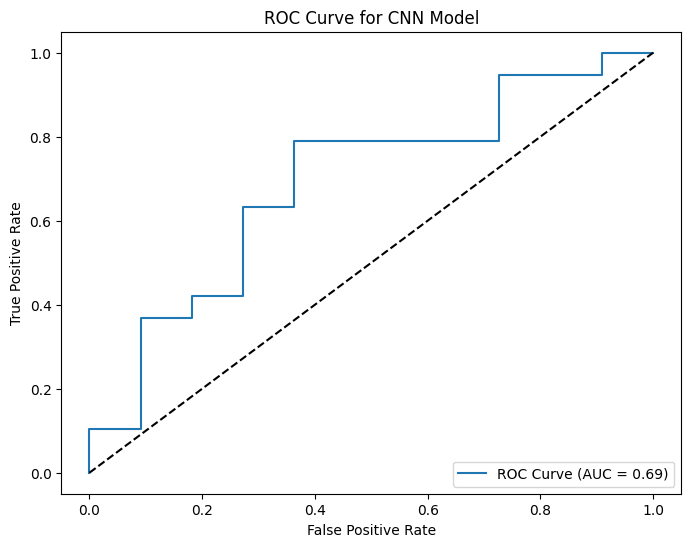

In [20]:
# cnn

import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, classification_report

# Define paths
base_dir = '/content/gdrive/My Drive/pd_diagnosis/Zeno Paper/'
data_path = os.path.join(base_dir, 'full_df.csv')
audio_dir = os.path.join(base_dir, 'voice')

# Load the DataFrame
data = pd.read_csv(data_path)
# data.drop("Unnamed: 0", axis=1, inplace=True)
diagnosis_zero_rows = data[data['diagnosis'] == 0]
data = data.drop(diagnosis_zero_rows.index[:40])

# Extract features and labels
features = data['recordId'].tolist()
labels = data['diagnosis'].values.ravel()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.15, random_state=122)

# Helper function to load and convert audio files to MFCCs
def load_mfccs(record_ids, audio_dir, n_mfcc=64, max_len=200):
    mfcc_features = []
    for record_id in record_ids:
        file_path = os.path.join(audio_dir, f"{record_id}.m4a")
        try:
            y, sr = librosa.load(file_path)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
            # Pad or truncate MFCCs to ensure consistent shape
            if mfcc.shape[1] < max_len:
                mfcc = np.pad(mfcc, ((0, 0), (0, max_len - mfcc.shape[1])), mode='constant')
            else:
                mfcc = mfcc[:, :max_len]
            mfcc_features.append(mfcc)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            mfcc_features.append(np.zeros((n_mfcc, max_len)))  # Placeholder if loading fails
    return np.array(mfcc_features)

# Load MFCCs for training and testing sets
X_train_mfccs = load_mfccs(X_train, audio_dir)
X_test_mfccs = load_mfccs(X_test, audio_dir)

# Reshape MFCCs for CNN input
X_train_mfccs = X_train_mfccs[..., np.newaxis]
X_test_mfccs = X_test_mfccs[..., np.newaxis]

# Define an enhanced CNN model
cnn_model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(64, 200, 1)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
cnn_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_mfccs, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Predict probabilities on the test set
y_pred_prob = cnn_model.predict(X_test_mfccs).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CNN Model")
plt.legend(loc="lower right")
plt.show()

**qSVM Installations**

In [22]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.7 MB/s eta 0:00:00


In [23]:
!pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 14.2 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512544 sha256=06c790b2e6a50d3cbe8c2a7032962b5bb7c24a7564ead01f738259744ba95c12
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


**Quantum Kernels**

Z Feature Map (No Entanglement)

In [24]:
import numpy as np
from qiskit.circuit.library import ZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.svm import SVC

# Define the feature map
feature_map = ZFeatureMap(feature_dimension=15, reps=1)

# Initialize the quantum kernel using FidelityQuantumKernel (no need for manual statevector)
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

# Compute the kernel matrices using the built-in evaluate method
kernel_matrix_train = quantum_kernel.evaluate(X_train[:30])
kernel_matrix_test = quantum_kernel.evaluate(X_test[:15], y_vec=X_train[:30])

# Use SVC with precomputed kernel
qsvm_z = SVC(kernel='precomputed')
qsvm_z.fit(kernel_matrix_train, y_train[:30])

# Make predictions
y_pred = qsvm_z.predict(kernel_matrix_test)
y_scores = qsvm_z.decision_function(kernel_matrix_test)

accuracy = accuracy_score(y_test[:15], y_pred)
precision = precision_score(y_test[:15], y_pred, average='weighted')
recall = recall_score(y_test[:15], y_pred, average='weighted')
roc_auc = roc_auc_score(y_test[:15], y_scores)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC/AUC Score: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test[:15], y_pred))

Accuracy: 0.87
Precision: 0.87
Recall: 0.87
ROC/AUC Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.90      0.90      0.90        10

    accuracy                           0.87        15
   macro avg       0.85      0.85      0.85        15
weighted avg       0.87      0.87      0.87        15



ZZFeatureMap (Entangled)

In [25]:
import numpy as np
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.svm import SVC

# Define the feature map
feature_map = ZZFeatureMap(feature_dimension=15, reps=1, entanglement='circular')

# Initialize the quantum kernel using FidelityQuantumKernel (no need for manual statevector)
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

# Compute the kernel matrices using the built-in evaluate method
kernel_matrix_train = quantum_kernel.evaluate(X_train[:30])
kernel_matrix_test = quantum_kernel.evaluate(X_test[:15], y_vec=X_train[:30])

# Use SVC with precomputed kernel
qsvm_zz = SVC(kernel='precomputed')
qsvm_zz.fit(kernel_matrix_train, y_train[:30])

# Make predictions
y_pred = qsvm_zz.predict(kernel_matrix_test)
y_scores = qsvm_zz.decision_function(kernel_matrix_test)

accuracy = accuracy_score(y_test[:15], y_pred)
precision = precision_score(y_test[:15], y_pred, average='weighted')
recall = recall_score(y_test[:15], y_pred, average='weighted')
roc_auc = roc_auc_score(y_test[:15], y_scores)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC/AUC Score: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test[:15], y_pred))

Accuracy: 0.67
Precision: 0.44
Recall: 0.67
ROC/AUC Score: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.67      1.00      0.80        10

    accuracy                           0.67        15
   macro avg       0.33      0.50      0.40        15
weighted avg       0.44      0.67      0.53        15



Proposed Model

In [50]:
!pip install pennylane

import pennylane as qml
from pennylane import numpy as np
import math
import time

feature_importances = np.array([
    0.082030,  # age
    0.046870,  # tap_iti_consistency
    0.045338,  # left_taps
    0.043864,  # total_taps
    0.038588,  # right_taps
    0.029348,  # tap_accel_spectral_spread
    0.026897,  # tap_accel_spectral_centroid
    0.026357,  # tap_accel_std_z
    0.023726,  # tap_accel_mean_freq
    0.020974,  # tap_accel_std_x
    0.019336,  # gait_accel_std_z
    0.019327,  # tap_accel_rms
    0.019190,  # Spectral_Centroid_mean
    0.017527,  # tap_accel_std_y
    0.017189   # gait_accel_rms_z
])

def softmax_temperature(x, T=1.0):
    e_x = np.exp((x - np.max(x)) / T)
    return e_x / e_x.sum()

n_qubits = len(feature_importances)
dev = qml.device("default.qubit", wires=n_qubits)

def aggregate_measurements(measurements):
    return np.sum(softmax_temperature(feature_importances, T=0.01) * measurements)

@qml.qnode(dev)
def quantum_kernel(x1, x2):
    qml.templates.AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(qml.templates.AngleEmbedding)(x2, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

def quantum_kernel_function(x1, x2):
    measurements = quantum_kernel(x1, x2)
    return aggregate_measurements(measurements)

def kernel_matrix(X1, X2):
    return np.array([[quantum_kernel_function(x1, x2) for x2 in X2] for x1 in X1])

def kernel_matrix_with_logging(X1, X2):
    N = len(X1)
    M = len(X2)
    K = np.zeros((N, M))
    start_time = time.time()
    for i in range(N):
        for j in range(M):
            K[i, j] = quantum_kernel_function(X1[i], X2[j])
        if i % 10 == 1:
            elapsed_time = time.time() - start_time
            progress = (i * M) / (N * M)
            estimated_total_time = elapsed_time / progress if progress > 0 else 0
            estimated_remaining_time = estimated_total_time - elapsed_time
            print(f"Progress: {i}/{N} rows completed")
            print(f"Elapsed time: {elapsed_time:.2f} seconds")
            print(f"Estimated remaining time: {estimated_remaining_time:.2f} seconds")
    return K

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

K_train = kernel_matrix_with_logging(X_train, X_train)
K_test = kernel_matrix_with_logging(X_test, X_train)

clf = SVC(kernel='precomputed')
clf.fit(K_train, y_train)

y_pred = clf.predict(K_test)
y_scores = clf.decision_function(K_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_scores)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC/AUC Score: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Progress: 1/164 rows completed
Elapsed time: 8.83 seconds
Estimated remaining time: 1439.92 seconds
Progress: 11/164 rows completed
Elapsed time: 53.31 seconds
Estimated remaining time: 741.46 seconds
Progress: 21/164 rows completed
Elapsed time: 97.83 seconds
Estimated remaining time: 666.18 seconds
Progress: 31/164 rows completed
Elapsed time: 141.78 seconds
Estimated remaining time: 608.29 seconds
Progress: 41/164 rows completed
Elapsed time: 186.62 seconds
Estimated remaining time: 559.86 seconds
Progress: 51/164 rows completed
Elapsed time: 231.06 seconds
Estimated remaining time: 511.96 seconds
Progress: 61/164 rows completed
Elapsed time: 275.87 seconds
Estimated remaining time: 465.81 seconds
Progress: 71/164 rows completed
Elapsed time: 320.71 seconds
Estimated remaining time: 420.09 seconds
Progress: 81/164 rows completed
Elapsed time: 364.75 seconds
Estimated remaining time: 373.76 seconds
Progress: 91/164 rows completed
Elapsed time: 409.42 seconds
Estimated remaining time:

In [51]:
!pip install pennylane

import pennylane as qml
from pennylane import numpy as np
import math
import time

feature_importances = np.array([
    0.082030,  # age
    0.046870,  # tap_iti_consistency
    0.045338,  # left_taps
    0.043864,  # total_taps
    0.038588,  # right_taps
    0.029348,  # tap_accel_spectral_spread
    0.026897,  # tap_accel_spectral_centroid
    0.026357,  # tap_accel_std_z
    0.023726,  # tap_accel_mean_freq
    0.020974,  # tap_accel_std_x
    0.019336,  # gait_accel_std_z
    0.019327,  # tap_accel_rms
    0.019190,  # Spectral_Centroid_mean
    0.017527,  # tap_accel_std_y
    0.017189   # gait_accel_rms_z
])

def softmax_temperature(x, T=1.0):
    e_x = np.exp((x - np.max(x)) / T)
    return e_x / e_x.sum()

n_qubits = len(feature_importances)
dev = qml.device("default.qubit", wires=n_qubits)

def aggregate_measurements(measurements):
    return np.sum(softmax_temperature(feature_importances, T=0.01) * measurements)

@qml.qnode(dev)
def quantum_kernel(x1, x2):
    qml.templates.AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(qml.templates.AngleEmbedding)(x2, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

def quantum_kernel_function(x1, x2):
    measurements = quantum_kernel(x1, x2)
    return aggregate_measurements(measurements)

def kernel_matrix(X1, X2):
    return np.array([[quantum_kernel_function(x1, x2) for x2 in X2] for x1 in X1])

def kernel_matrix_with_logging(X1, X2):
    N = len(X1)
    M = len(X2)
    K = np.zeros((N, M))
    start_time = time.time()
    for i in range(N):
        for j in range(M):
            K[i, j] = quantum_kernel_function(X1[i], X2[j])
        if i % 10 == 1:
            elapsed_time = time.time() - start_time
            progress = (i * M) / (N * M)
            estimated_total_time = elapsed_time / progress if progress > 0 else 0
            estimated_remaining_time = estimated_total_time - elapsed_time
            print(f"Progress: {i}/{N} rows completed")
            print(f"Elapsed time: {elapsed_time:.2f} seconds")
            print(f"Estimated remaining time: {estimated_remaining_time:.2f} seconds")
    return K

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

K_train = kernel_matrix_with_logging(X_train, X_train)
K_test = kernel_matrix_with_logging(X_test, X_train)

clf = SVC(kernel='precomputed')
clf.fit(K_train, y_train)

y_pred = clf.predict(K_test)
y_scores = clf.decision_function(K_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_scores)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC/AUC Score: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Progress: 1/164 rows completed
Elapsed time: 8.43 seconds
Estimated remaining time: 1373.49 seconds
Progress: 11/164 rows completed
Elapsed time: 54.97 seconds
Estimated remaining time: 764.52 seconds
Progress: 21/164 rows completed
Elapsed time: 101.94 seconds
Estimated remaining time: 694.14 seconds
Progress: 31/164 rows completed
Elapsed time: 147.30 seconds
Estimated remaining time: 631.98 seconds
Progress: 41/164 rows completed
Elapsed time: 193.35 seconds
Estimated remaining time: 580.05 seconds
Progress: 51/164 rows completed
Elapsed time: 239.55 seconds
Estimated remaining time: 530.77 seconds
Progress: 61/164 rows completed
Elapsed time: 285.62 seconds
Estimated remaining time: 482.28 seconds
Progress: 71/164 rows completed
Elapsed time: 331.96 seconds
Estimated remaining time: 434.82 seconds
Progress: 81/164 rows completed
Elapsed time: 379.03 seconds
Estimated remaining time: 388.39 seconds
Progress: 91/164 rows completed
Elapsed time: 425.30 seconds
Estimated remaining time